# BRICS: An Emerging Economic Superpower
### Project Group : Saniya Lalani and Isaac Oseas


![BRICS](https://curiousmatic.com/wp-content/uploads/2014/07/BRICSmap.jpg)

In 2001 Goldman Sachs research team released a paper, ["The World Needs Better BRICs"](http://www.goldmansachs.com/our-thinking/archive/archive-pdfs/build-better-brics.pdf), that claimed that Brazil, Russia, India, and China would play a greater economic role and be among the largest economies in the world within the next 50 years. Subsequently, the foreign ministers for each country began talks in 2006 and later that year formalized an agreement to collaborate on economic issues. In 2011 South Africa was included in the group, and the name was changed to BRICS. 

While the [BRICS](http://brics2016.gov.in/content/innerpage/about-usphp.php) countries currently make up 43 percent of the world population and 30 percent of global GDP, the countries' economies have little in common with one another. 

In this project we will work to visualize data pertaining to both changes in the GDP and differences in unemployment between the BRICS countries over the past few decades. This visualization will allow us to better understand what the trends in unemployment in the BRICS countries. We will also identify changes in GDP with respect to the changes in unemployment for the BRICS countries. 

### Data Source
We used data from the World Bank data bank on GDP growth, unemployment and youth unemployment to create a Data Frame of relevant information. We decided to start with 1991 to 2016 in order to make the time frame manageable, and since prior to 1991 many of the BRICS countries had a more state controlled economy. 

#### Importing Required Packages 

In [1]:
%matplotlib inline 

import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import datetime as dt           # date tools, used to note current date  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# plotly imports
import plotly                                   # just to print version and init notebook
import plotly.plotly as py
from plotly.offline import iplot, iplot_mpl     # plotting functions
import plotly.graph_objs as go                  # ditto
plotly.offline.init_notebook_mode() # run at the start of every ipython notebook



# these are new 
import os                       # operating system tools (check files)
import requests, io             # internet and input tools  
import zipfile as zf            # zip file tools 
import shutil                   # file management tools 

import datetime

#### Importing data from the World Bank databank
#### Dowloading a zip file and reading the csv inside the zip file 

In [2]:
url = 'http://databank.worldbank.org/data/download/WDI_csv.zip'
r = requests.get(url)

In [3]:
file = zf.ZipFile(io.BytesIO(r.content)) 
file

<zipfile.ZipFile file=<_io.BytesIO object at 0x106e4eeb8> mode='r'>

In [4]:
file.namelist()   

['WDIData.csv',
 'WDICountry.csv',
 'WDISeries.csv',
 'WDICountry-Series.csv',
 'WDISeries-Time.csv',
 'WDIFootNote.csv']

In [5]:
file_csv = file.open(file.namelist()[0])   
file_csv

<zipfile.ZipExtFile name='WDIData.csv' mode='r' compress_type=deflate>

In [6]:
df = pd.read_csv(file_csv,na_values='n/a')

#### Initilal Contents of the DataFrame

In [7]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

#### Selecting the columns we need to work on : Country Name, Indicator Name, Years : 1991 - 2016 by dropping the rest ( stored in col_indices) 

In [8]:
col_indices = [1,61] + list(range(3,35))
df.drop(df.columns[col_indices], axis=1, inplace=True)

#### Displaying the columns required

In [9]:
df.columns

Index(['Country Name', 'Indicator Name', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016'],
      dtype='object')

#### Selecting Countries in ***BRICS_List*** from the Country Name Column and ***observations*** required from Indicator Name for the BRICS countries. 


#### Observations Required : GDP, GDP Growth, Total Unemployment %, Youth Unemployment % - Female, Youth Unemployment % - Male

In order to avoid inconsistancies from different exchange rates and national calculations of unemployment we chose to use GDP in current USD and the percent of unemployment calculated by the International Labour Organization (ILO). 

#### Stored in a new DataFrame dd

In [10]:
BRICS_List = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
observations = ['GDP (current US$)','GDP growth (annual %)','Unemployment, total (% of total labor force) (modeled ILO estimate)','Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)', 'Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)']
dd = df[df['Indicator Name'].isin(observations) & df['Country Name'].isin(BRICS_List)]

#### Renaming the columns to make them more readable. 

In [11]:
dd = dd.rename(columns={'Country Name': 'BRICS_Country', 'Indicator Name': 'Observations'})
dd

BRICS_Country                                       Observations  \
110294              Brazil                                  GDP (current US$)   
110298              Brazil                              GDP growth (annual %)   
111256              Brazil  Unemployment, total (% of total labor force) (...   
111258              Brazil  Unemployment, youth female (% of female labor ...   
111260              Brazil  Unemployment, youth male (% of male labor forc...   
132854               China                                  GDP (current US$)   
132858               China                              GDP growth (annual %)   
133816               China  Unemployment, total (% of total labor force) (...   
133818               China  Unemployment, youth female (% of female labor ...   
133820               China  Unemployment, youth male (% of male labor forc...   
203542               India                                  GDP (current US$)   
203546               India                              GDP growth (annual %)   
204504               India  Unemployment, total (% of total labor force) (...   
204506               India  Unemployment, youth female (% of female labor ...   
204508               India  Unemployment, youth male (% of male labor forc...   
311830  Russian Federation                                  GDP (current US$)   
311834  Russian Federation                              GDP growth (annual %)   
312792  Russian Federation  Unemployment, total (% of total labor force) (...   
312794  Russian Federation  Unemployment, youth female (% of female labor ...   
312796  Russian Federation  Unemployment, youth male (% of male labor forc...   
335894        South Africa                                  GDP (current US$)   
335898        South Africa                              GDP growth (annual %)   
336856        South Africa  Unemployment, total (% of total labor force) (...   
336858        South Africa  Unemployment, youth female (% of female labor ...   
336860        South Africa  Unemployment, youth male (% of male labor forc...   

                1991          1992          1993          1994          1995  \
110294  6.028600e+11  4.005992e+11  4.377986e+11  5.581120e+11  7.856435e+11   
110298  1.511937e+00 -4.669132e-01  4.665169e+00  5.334552e+00  4.416731e+00   
111256  1.021100e+01  1.157900e+01  1.098700e+01  1.060400e+01  9.908000e+00   
111258  2.246800e+01  2.601200e+01  2.448400e+01  2.350100e+01  2.171000e+01   
111260  1.524500e+01  1.764900e+01  1.661200e+01  1.594600e+01  1.473100e+01   
132854  3.833728e+11  4.269152e+11  4.447309e+11  5.643252e+11  7.345480e+11   
132858  9.294076e+00  1.421616e+01  1.386758e+01  1.305216e+01  1.094923e+01   
133816  4.890000e+00  4.390000e+00  4.330000e+00  4.340000e+00  4.550000e+00   
133818  8.130000e+00  7.414000e+00  7.440000e+00  7.592000e+00  8.100000e+00   
133820  1.012500e+01  9.233000e+00  9.266000e+00  9.456000e+00  1.008800e+01   
203542  2.748422e+11  2.932627e+11  2.841940e+11  3.330150e+11  3.666002e+11   
203546  1.056831e+00  5.482396e+00  4.750776e+00  6.658924e+00  7.574492e+00   
204504  3.996000e+00  3.901000e+00  4.060000e+00  3.700000e+00  3.974000e+00   
204506  9.436000e+00  8.986000e+00  8.984000e+00  7.983000e+00  8.832000e+00   
204508  9.154000e+00  8.890000e+00  9.077000e+00  8.282000e+00  8.958000e+00   
311830  5.179630e+11  4.602906e+11  4.350837e+11  3.950773e+11  3.955311e+11   
311834 -5.046939e+00 -1.453107e+01 -8.668540e+00 -1.256976e+01 -4.143528e+00   
312792  1.211200e+01  5.181000e+00  5.883000e+00  8.131000e+00  9.449000e+00   
312794  2.443500e+01  1.293700e+01  1.394000e+01  1.747200e+01  1.997400e+01   
312796  2.293000e+01  1.294300e+01  1.348200e+01  1.533600e+01  1.775200e+01   
335894  1.202260e+11  1.305137e+11  1.343098e+11  1.397524e+11  1.554602e+11   
335898 -1.018308e+00 -2.137042e+00  1.233613e+00  3.200000e+00  3.100000e+00   
336856  2.393300e+01  2.353300e+01  2.590700e+01  2.000000e+01  1.

#### Renaming the observations to make them more readable. 

In [12]:
dd['Observations'] = dd['Observations'].replace(to_replace=['Unemployment, total (% of total labor force) (modeled ILO estimate)','Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)','Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)'], value=['Total Unemployment %', 'Youth Unemployment % - Female','Youth Unemployment % - Male'])

#### DataFrame after the observations are renamed

In [13]:
dd

BRICS_Country                   Observations          1991  \
110294              Brazil              GDP (current US$)  6.028600e+11   
110298              Brazil          GDP growth (annual %)  1.511937e+00   
111256              Brazil           Total Unemployment %  1.021100e+01   
111258              Brazil  Youth Unemployment % - Female  2.246800e+01   
111260              Brazil    Youth Unemployment % - Male  1.524500e+01   
132854               China              GDP (current US$)  3.833728e+11   
132858               China          GDP growth (annual %)  9.294076e+00   
133816               China           Total Unemployment %  4.890000e+00   
133818               China  Youth Unemployment % - Female  8.130000e+00   
133820               China    Youth Unemployment % - Male  1.012500e+01   
203542               India              GDP (current US$)  2.748422e+11   
203546               India          GDP growth (annual %)  1.056831e+00   
204504               India           Total Unemployment %  3.996000e+00   
204506               India  Youth Unemployment % - Female  9.436000e+00   
204508               India    Youth Unemployment % - Male  9.154000e+00   
311830  Russian Federation              GDP (current US$)  5.179630e+11   
311834  Russian Federation          GDP growth (annual %) -5.046939e+00   
312792  Russian Federation           Total Unemployment %  1.211200e+01   
312794  Russian Federation  Youth Unemployment % - Female  2.443500e+01   
312796  Russian Federation    Youth Unemployment % - Male  2.293000e+01   
335894        South Africa              GDP (current US$)  1.202260e+11   
335898        South Africa          GDP growth (annual %) -1.018308e+00   
336856        South Africa           Total Unemployment %  2.393300e+01   
336858        South Africa  Youth Unemployment % - Female  5.248100e+01   
336860        South Africa    Youth Unemployment % - Male  4.494400e+01   

                1992          1993          1994          1995          1996  \
110294  4.005992e+11  4.377986e+11  5.581120e+11  7.856435e+11  8.504258e+11   
110298 -4.669132e-01  4.665169e+00  5.334552e+00  4.416731e+00  2.207536e+00   
111256  1.157900e+01  1.098700e+01  1.060400e+01  9.908000e+00  1.119600e+01   
111258  2.601200e+01  2.448400e+01  2.350100e+01  2.171000e+01  2.503200e+01   
111260  1.764900e+01  1.661200e+01  1.594600e+01  1.473100e+01  1.698400e+01   
132854  4.269152e+11  4.447309e+11  5.643252e+11  7.345480e+11  8.637464e+11   
132858  1.421616e+01  1.386758e+01  1.305216e+01  1.094923e+01  9.928372e+00   
133816  4.390000e+00  4.330000e+00  4.340000e+00  4.550000e+00  4.590000e+00   
133818  7.414000e+00  7.440000e+00  7.592000e+00  8.100000e+00  8.312000e+00   
133820  9.233000e+00  9.266000e+00  9.456000e+00  1.008800e+01  1.035200e+01   
203542  2.932627e+11  2.841940e+11  3.330150e+11  3.666002e+11  3.997873e+11   
203546  5.482396e+00  4.750776e+00  6.658924e+00  7.574492e+00  7.549522e+00   
204504  3.901000e+00  4.060000e+00  3.700000e+00  3.974000e+00  3.951000e+00   
204506  8.986000e+00  8.984000e+00  7.983000e+00  8.832000e+00  8.808000e+00   
204508  8.890000e+00  9.077000e+00  8.282000e+00  8.958000e+00  8.939000e+00   
311830  4.602906e+11  4.350837e+11  3.950773e+11  3.955311e+11  3.917200e+11   
311834 -1.453107e+01 -8.668540e+00 -1.256976e+01 -4.143528e+00 -3.600000e+00   
312792  5.181000e+00  5.883000e+00  8.131000e+00  9.449000e+00  9.665000e+00   
312794  1.293700e+01  1.394000e+01  1.747200e+01  1.997400e+01  2.050200e+01   
312796  1.294300e+01  1.348200e+01  1.533600e+01  1.775200e+01  1.833100e+01   
335894  1.305137e+11  1.343098e+11  1.397524e+11  1.554602e+11  1.476081e+11   
335898 -2.137042e+00  1.233613e+00  3.200000e+00  3.100000e+00  4.300000e+00   
336856  2.353300e+01  2.590700e+01  2.000000e+01  1.690000e+01  2.100000e+01   
336858  5.132300e+01  5.453700e+01  4.442300e+01  3.751800e+01  4.665000e+01   
336860  4.376700e+01  4.600800e+01  3.770100e+01  3.184100e+01

#### Using Multi-indexes as we have multi - dimensional data. 

In [14]:
ddi = dd.set_index(['BRICS_Country', 'Observations'])
ddi

1991          1992  \
BRICS_Country      Observations                                                
Brazil             GDP (current US$)              6.028600e+11  4.005992e+11   
                   GDP growth (annual %)          1.511937e+00 -4.669132e-01   
                   Total Unemployment %           1.021100e+01  1.157900e+01   
                   Youth Unemployment % - Female  2.246800e+01  2.601200e+01   
                   Youth Unemployment % - Male    1.524500e+01  1.764900e+01   
China              GDP (current US$)              3.833728e+11  4.269152e+11   
                   GDP growth (annual %)          9.294076e+00  1.421616e+01   
                   Total Unemployment %           4.890000e+00  4.390000e+00   
                   Youth Unemployment % - Female  8.130000e+00  7.414000e+00   
                   Youth Unemployment % - Male    1.012500e+01  9.233000e+00   
India              GDP (current US$)              2.748422e+11  2.932627e+11   
                   GDP growth (annual %)          1.056831e+00  5.482396e+00   
                   Total Unemployment %           3.996000e+00  3.901000e+00   
                   Youth Unemployment % - Female  9.436000e+00  8.986000e+00   
                   Youth Unemployment % - Male    9.154000e+00  8.890000e+00   
Russian Federation GDP (current US$)              5.179630e+11  4.602906e+11   
                   GDP growth (annual %)         -5.046939e+00 -1.453107e+01   
                   Total Unemployment %           1.211200e+01  5.181000e+00   
                   Youth Unemployment % - Female  2.443500e+01  1.293700e+01   
                   Youth Unemployment % - Male    2.293000e+01  1.294300e+01   
South Africa       GDP (current US$)              1.202260e+11  1.305137e+11   
                   GDP growth (annual %)         -1.018308e+00 -2.137042e+00   
                   Total Unemployment %           2.393300e+01  2.353300e+01   
                   Youth Unemployment % - Female  5.248100e+01  5.132300e+01   
                   Youth Unemployment % - Male    4.494400e+01  4.376700e+01   

                                                          1993          1994  \
BRICS_Country      Observations                                                
Brazil             GDP (current US$)              4.377986e+11  5.581120e+11   
                   GDP growth (annual %)          4.665169e+00  5.334552e+00   
                   Total Unemployment %           1.098700e+01  1.060400e+01   
                   Youth Unemployment % - Female  2.448400e+01  2.350100e+01   
                   Youth Unemployment % - Male    1.661200e+01  1.594600e+01   
China              GDP (current US$)              4.447309e+11  5.643252e+11   
                   GDP growth (annual %)          1.386758e+01  1.305216e+01   
                   Total Unemployment %           4.330000e+00  4.340000e+00   
                   Youth Unemployment % - Female  7.440000e+00  7.592000e+00   
                   Youth Unemployment % - Male    9.266000e+00  9.456000e+00   
India              GDP (current US$)              2.841940e+11  3.330150e+11   
                   GDP growth (annual %)          4.750776e+00  6.658924e+00   
                   Total Unemployment %           4.060000e+00  3.700000e+00   
                   Youth Unemployment % - Female  8.984000e+00  7.983000e+00   
                   Youth Unemployment % - Male    9.077000e+00  8.282000e+00   
Russian Federation GDP (current US$)              4.350837e+11  3.950773e+11   
                   GDP growth (annual %)         -8.668540e+00 -1.256976e+01   
                   Total Unemployment %           5.883000e+00  8.131000e+00   
                   Youth Unemployment % - Female  1.394000e+01  1.747200e+01   
                   Youth Unemployment % - Male    1.348200e+01  1.533600e+01   
South Africa       GDP (current US$)              1.343098e+11  1.397524e+11   
                   GDP growth (annual %)          1.23361

#### The final DataFrame after cleaning and shaping 

In [15]:
ddi
ddi_main = ddi

## GDP over time

Using the GDP in current USD we were able to see the changes in total GDP over time for all the BRICS countries. We also marked 2006 as the year the BRIC countries began informal talks to set up their economic and political association, and 2011 as the year South Africa joined. 

We also created a visual of BRICS countries total GDP in 2006 and 2011 to help show the extreme difference in economic size between the countries. 


In [16]:
brics_list = ['Brazil', 'China', "Russian Federation", 'India', 'South Africa']   #BRICS coutries list

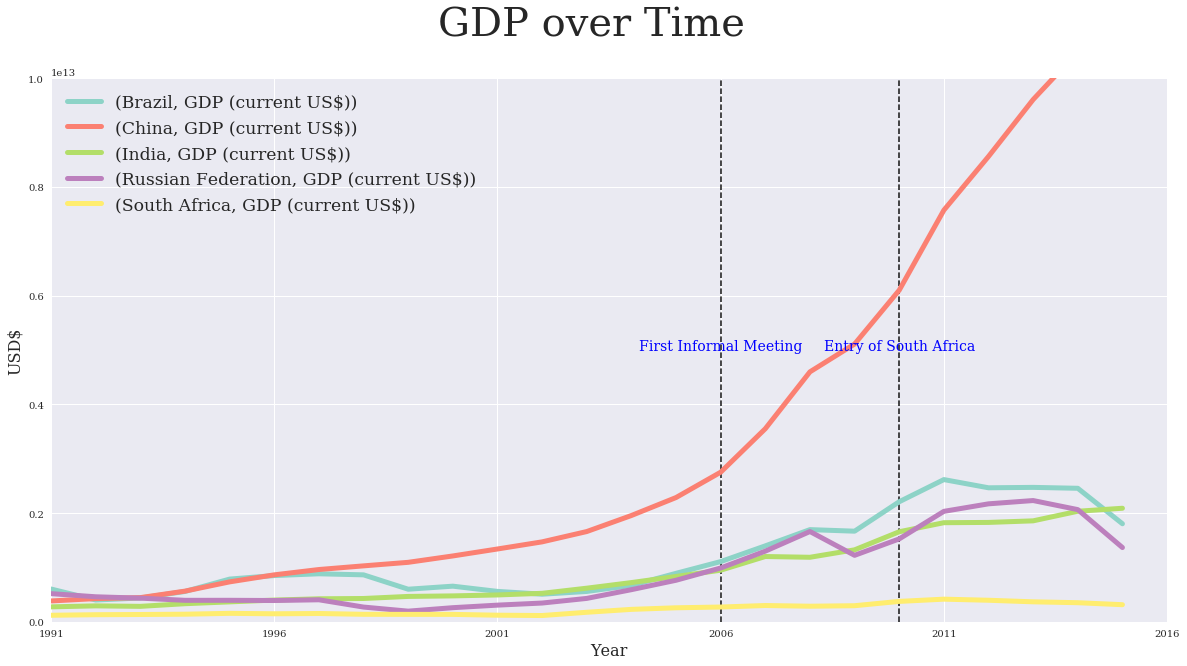

In [17]:
x = 15                #year 2006
y = 19                #year 2011

GDP_current = ddi.reset_index()
GDP_current = GDP_current[GDP_current['Observations'] == 'GDP (current US$)']    #selecting the required observation 
GDP_current= GDP_current.set_index(['BRICS_Country', 'Observations'])
GDP_current = GDP_current.T

plt.style.use('seaborn-notebook')   #Using seaborn-notebook style
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(20, 10))
plt.xlabel('Year', fontsize = 16)
plt.ylabel('USD$',fontsize = 16)
fig.suptitle('GDP over Time', fontsize = 40)
GDP_current.plot(ax=ax,lw=5,legend= True, colormap = 'Set3')
ax.yaxis.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.vlines(x, 0, 1e13, linestyles='dashed', alpha=.8, color = 'BLACK')       #vertical dashed line
ax.text(x, 1e13/2, 'First Informal Meeting', horizontalalignment='center', fontsize = 14, color= 'BLUE')
ax.vlines(y, 0, 1e13, linestyles='dashed', alpha=.8, color = 'BLACK')       #vertical dashed line
ax.text(y, 1e13/2, 'Entry of South Africa', horizontalalignment='center', fontsize = 14, color= 'BLUE')
ax.set_ylim([0, 1e13])
ax.legend(loc = 'upper left', frameon=False, fontsize = 'x-large' )
plt.show()


    

In 2006, Foreign Ministers from Brazil, Russia, India, and China convened for an informal meeting on the margins of the General Debate of the UN General Assembly (UNGA). The ministers decided at that point to begin annual meetings of State and Government officials. The countries began to cooperate to a greater extent following the 2006 meeting, and often demonstrated shared positions on [UN resolutions](http://dseu.lboro.ac.uk/Documents/Policy_Papers/DSEU_Policy_Paper06.pdf). In 2009, the groups held their first Summit, and issued a joint [statement](http://brics2016.gov.in/upload/uploadfiles/files/1st_dec.pdf) about reforming financial institutions. 

In [18]:
l = GDP_current.values
s = list(l)
d = { 'BRICS' : BRICS_List, 'GDP' : s[15]}       #dict

GDP_2006 = pd.DataFrame(d)            #creating a new DataFrame GDP_2006

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = GDP_2006['BRICS'],
        z = GDP_2006['GDP'],
        locationmode = 'country names',
        text = GDP_2006['BRICS'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
    title = 'GDP of BRICS Countries in 2006',
    geo = dict(
        scope = 'world',
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

iplot(go.Figure(data=data, layout=layout), link_text="")

In 2010, South Africa was added to the association in a move that surprised many [economists](https://www.theguardian.com/world/2011/apr/19/south-africa-joins-bric-club) because of its low level of economic growth compared to other BRICS countries.  Some economic and policy consultants have speculated that the inclusion of South Africa was an attempt by other BRICS countries, particularly China, to gain a foothold on the African continent. It would be difficult to quantify how the addition of South Africa has aided trade or investment on the continent for other BRICS countries.

South Africa, however, did benefit by joining the BRICS association. In [2013]( https://www.brandsouthafrica.com/investments-immigration/business/trends/global/brics-020513), the Industrial and Commercial Bank of China (ICBC) owned 20 percent of the shares in South Africa’s Standard Bank, and Russia had become a major importer for South Africa’s citrus fruits. Despite these changes, South Africa clearly remains the smallest economy within the BRICS association. The country’s unemployment rate has also been consistently higher than the other BRICS countries, both before and after joining the association, though the rate has not experienced large fluctuations since 2010. 



In [19]:
d = { 'BRICS' : BRICS_List, 'GDP' : s[19]}     #dict 

GDP_2011 = pd.DataFrame(d)        #creating a new datafram GDP_2011

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = GDP_2011['BRICS'],
        z = GDP_2011['GDP'],
        locationmode = 'country names',
        text = GDP_2011['BRICS'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
    title = 'Formation of BRICS Countries in 2011',
    geo = dict(
        scope = 'world',                   #setting the scope as world 
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

iplot(go.Figure(data=data, layout=layout), link_text="")


The GDP graph expresses the inequality between the BRICS countries. We sought, however, to gain a deeper understanding of this apparent inequality by examining the differences in these countries' GDP growth rates over time. The differences in growth rates are particularly important because of the [claims](http://www.en.ipea.gov.br/agencia/images/stories/PDFs/rtm/110818_rtm_ingles02_cap3.pdf) by the BRICS association that the BRICS countries are leading the post-2008 economic recovery. 

We decided to compare the GDP growth rate for each member of BRICS with the mean GDP growth rate of all BRICS countries. 

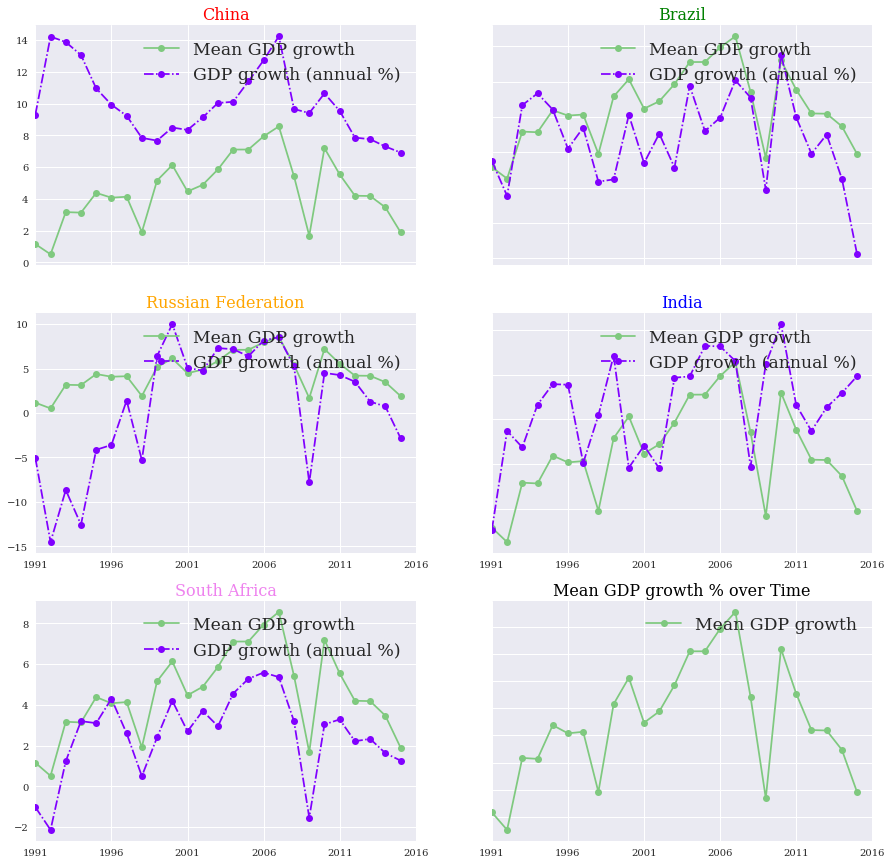

In [20]:
Req = ['GDP growth (annual %)']
Comparison = ddi.reset_index()              #reset index
Comparison = Comparison[Comparison['Observations'].isin(Req)]                #Selecting the required fields
Comparison= Comparison.set_index(['BRICS_Country', 'Observations'])
Comparison = Comparison.T                  #Transpose 
mean = Comparison.mean(axis=1)             #Calculating the mean GDP growth Rate
Comparison = Comparison.assign(mean=mean.values)   #Adding a column mean with the mean GDP growth rate values


f, axarr = plt.subplots(3, 2, figsize = (15,15))         #[3,2] subplots
Comparison['mean'].plot(linestyle='-', marker='o', colormap = "Accent", label = 'Mean GDP growth',ax = axarr[0,0])
Comparison['China'].plot(linestyle ='-.',marker ='o', colormap = "rainbow",
       ax=axarr[0,0])
axarr[0,0].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')
axarr[0, 0].set_title('China', color = 'Red', fontsize = 16)

Comparison['mean'].plot(linestyle='-', marker='o', colormap = "Accent", label = 'Mean GDP growth',ax = axarr[0,1])
Comparison['Brazil'].plot(linestyle ='-.',marker ='o', colormap = "rainbow",
       ax=axarr[0,1])
axarr[0, 1].set_title('Brazil',color = 'Green', fontsize =16)
axarr[0,1].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')

Comparison['mean'].plot(linestyle='-', marker='o', colormap = "Accent", label = 'Mean GDP growth',ax = axarr[1,0])
Comparison['Russian Federation'].plot(linestyle ='-.',marker ='o', colormap = "rainbow",
       ax=axarr[1,0])
axarr[1,0].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')
axarr[1, 0].set_title('Russian Federation', color = 'Orange', fontsize = 16)

Comparison['mean'].plot(linestyle='-', marker='o', colormap = "Accent", label = 'Mean GDP growth',ax = axarr[1,1])
Comparison['India'].plot(linestyle ='-.',marker ='o', colormap = "rainbow",
       ax=axarr[1,1])
axarr[1,1].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')
axarr[1, 1].set_title('India', color = 'Blue', fontsize = 16)

Comparison['mean'].plot(linestyle='-', marker='o', colormap = "Accent", label = 'Mean GDP growth',ax = axarr[2,0])
Comparison['South Africa'].plot(linestyle ='-.',marker ='o', colormap = "rainbow",
       ax=axarr[2,0])
axarr[2,0].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')
axarr[2, 0].set_title('South Africa', color = 'Violet', fontsize = 16)

Comparison['mean'].plot(linestyle='-', marker='o', colormap = "Accent", label = 'Mean GDP growth',ax = axarr[2,1])
axarr[2,1].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')
axarr[2, 1].set_title('Mean GDP growth % over Time', color = 'Black', fontsize = 16)


# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

plt.show()


The graphs express that there is no correlation in economic growth rates between the BRICS countries. In the context of our growth rate comparison, China was often an outlier, as it experienced rapid economic growth in the 1990s, while other countries had a negative annual growth rate. 

### South Africa
South Africa is predictably an outlier because it was not included in the original Goldman Sachs report that theorized the growing economic influence of Brazil, Russia, India, and China. According to [African Economic Outlook]( http://www.africaneconomicoutlook.org/en/country-notes/south-africa), South Africa has suffered from “electricity shortages, low commodity prices and low consumer and business confidence” that has continued to restrain its economic growth in recent years. 

### China
China has experienced an extremely high GDP growth rate since the 1990s, which has been tied to the country becoming a base for manufacturing and attracting increasing capital investments, according to the [IMF]( https://www.imf.org/EXTERNAL/PUBS/FT/ISSUES8/INDEX.HTM). The Chinese government has also used its high level of foreign reserves to bailout banks, and, in 2009, new lending made up [31 percent of China's GDP]( https://www.hindawi.com/journals/ecri/2012/961694/). China’s trade surplus and government intervention is likely the reason why the country’s GDP growth rate has remained high, including during the 2008 global economic crisis. 


## Unemployment over time

In 2016, the World Economic Forum published an [article](https://www.weforum.org/agenda/2016/04/what-is-the-state-of-the-brics-economies/) detailing the economic and social differences betweent the BRICS countries. Since the BRICS countries vary greatly in terms of the basis of their economies, we decided to compare unemployment.

We initially compared the unemployment over time, and have a more in-depth look at youth unemployment in the following section.

#### Brazil

Brazil’s unemployment rate peaked in 1998, when the country experienced a currency crisis. According to the [OECD]( https://www.oecd.org/employment/emp/42546065.pdf), the country also experienced a number of economic changes in the 2000s that led to more workers being ‘self-employed’ and doing informal work for companies. 

#### Russia

Russia experienced positive economic growth for the first time since the dissolution of the Soviet Union in 1997, but was hit the following year by an economic crisis, and consequent devaluation of its currency. After the 1998 economic crisis, the country benefited from high petroleum prices, and a US and EU trade barrier for Russian manufactured goods and agricultural products. The country also received economic aid that may have encouraged growth.

#### China 

China has experienced substantial industrial growth, but it must maintain an annual growth in GDP of roughly 8 percent in order to create jobs for young people entering the workforce. The country has also benefited from joining the World Trade Organization in 2001, and the fairly liberal trade policy between China and the US.

#### India

India has maintained an extremely low unemployment rate since 1991, but this is partially the result of a high rate of part-time work and a generally underemployed working population. In 2012, the [Times of India]( http://timesofindia.indiatimes.com/india/Why-India-is-not-on-the-job/articleshow/16908904.cms) reported that as much as 93 percent of the country’s workforce is part of the informal sector. 

#### South Africa

In terms of unemployment rates, South Africa is again an outlier, with an unemployment rate well above the other BRICS countries. [Economists]( http://www.bbc.com/news/business-27337520) have estimated that it would take an average economic growth rate of more than 5 percent per year to bring South Africa toward an unemployment rate comparable to that of these other nations. As the chart on GDP growth rate above shows, South Africa’s economic growth rate has frequently been well below the 5 percent mark.
 

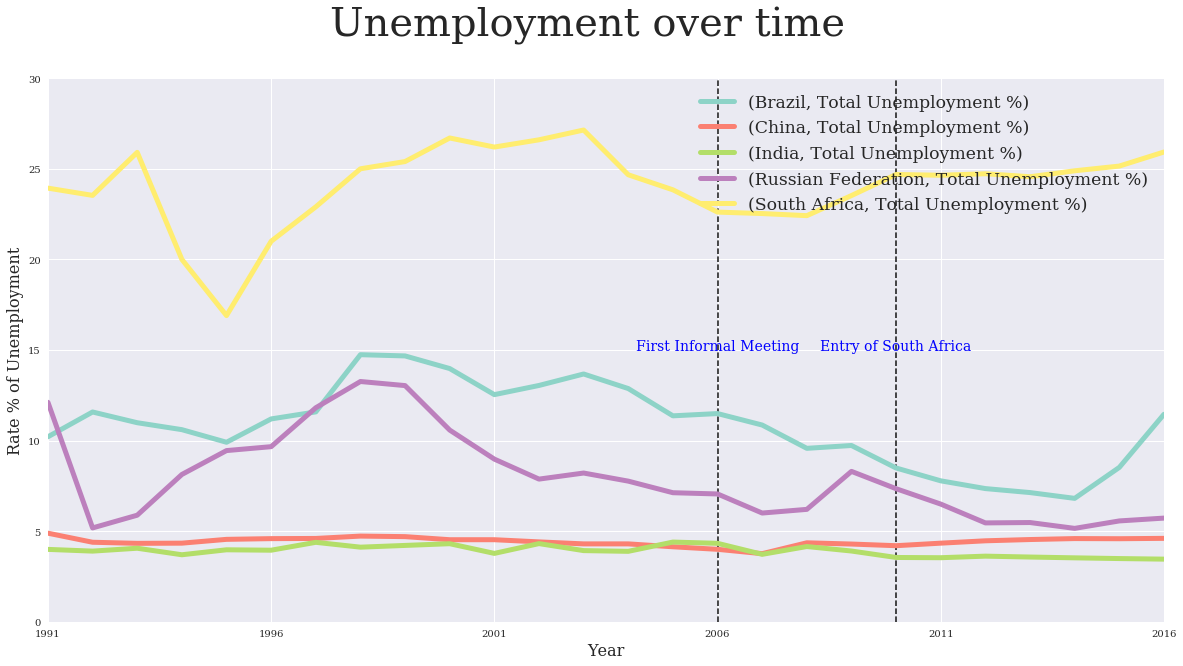

In [21]:
unemployment = ddi.reset_index()            #reset index
unemployment = unemployment[unemployment['Observations'] == 'Total Unemployment %'] #Selecting required observations
unemployment= unemployment.set_index(['BRICS_Country', 'Observations'])
unemployment = unemployment.T          #Transpose 

plt.style.use('seaborn-notebook')        #Using seaborn-notebook style 
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(20, 10))
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Rate % of Unemployment',fontsize = 16)
fig.suptitle('Unemployment over time', fontsize = 40)
unemployment.plot(ax=ax,lw=5,legend= True, colormap = 'Set3')
ax.yaxis.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.vlines(x, 0, 30, linestyles='dashed', alpha=.8, color = 'BLACK')
ax.text(x, 15, 'First Informal Meeting', horizontalalignment='center', fontsize = 14, color= 'BLUE')
ax.vlines(y, 0, 30, linestyles='dashed', alpha=.8, color = 'BLACK')
ax.text(y, 15, 'Entry of South Africa', horizontalalignment='center', fontsize = 14, color= 'BLUE')
ax.set_ylim([0, 30])
ax.legend(loc = 'upper right', frameon=False, fontsize = 'x-large' )
plt.show()

In [22]:
mean2 = unemployment.mean(axis=1)                        #Calculating the mean unemployment rate of BRICS coutries 
unemployment_2 = unemployment.assign(mean = mean2.values)   #Adding a column mean to unemployment_2

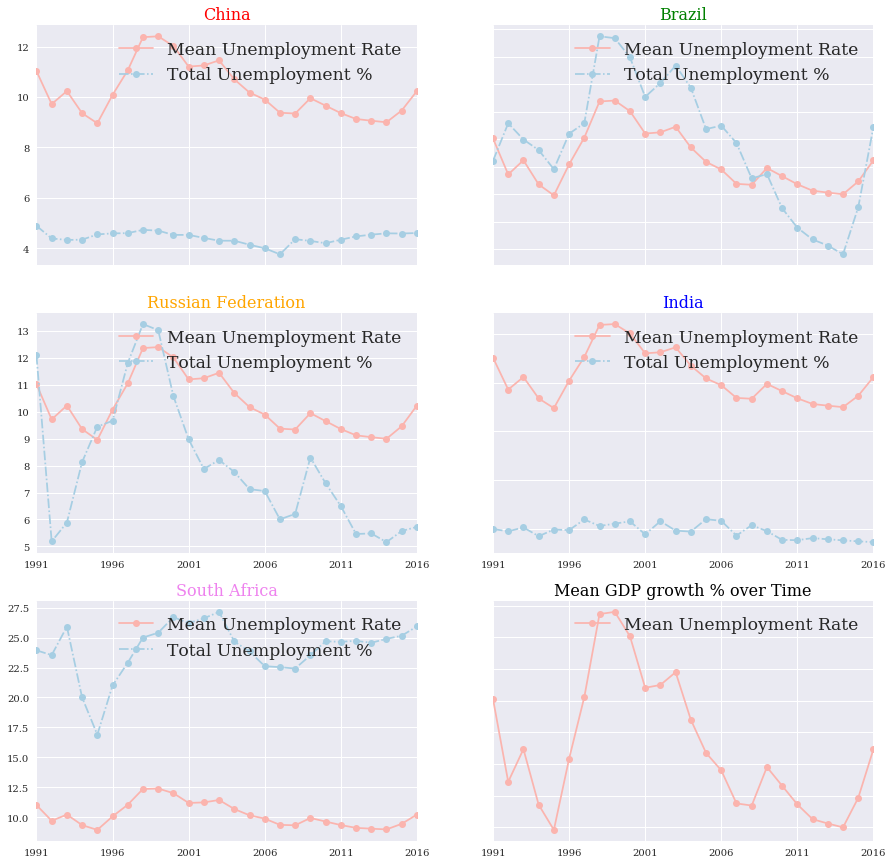

In [23]:


f, axarr = plt.subplots(3, 2, figsize = (15,15))           #[3,2] subplots for showing unemployment in BRICS
unemployment_2['mean'].plot(linestyle='-', marker='o', colormap = "Pastel1", label = 'Mean Unemployment Rate',ax = axarr[0,0])
unemployment_2['China'].plot(linestyle ='-.',marker ='o', colormap = "Paired",
       ax=axarr[0,0])
axarr[0,0].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')
axarr[0, 0].set_title('China', color = 'Red', fontsize = 16)

unemployment_2['mean'].plot(linestyle='-', marker='o', colormap = "Pastel1", label = 'Mean Unemployment Rate',ax = axarr[0,1])
unemployment_2['Brazil'].plot(linestyle ='-.',marker ='o', colormap = "Paired",
       ax=axarr[0,1])
axarr[0, 1].set_title('Brazil',color = 'Green', fontsize =16)
axarr[0,1].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')

unemployment_2['mean'].plot(linestyle='-', marker='o', colormap = "Pastel1", label = 'Mean Unemployment Rate',ax = axarr[1,0])
unemployment_2['Russian Federation'].plot(linestyle ='-.',marker ='o', colormap = "Paired",
       ax=axarr[1,0])
axarr[1,0].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')
axarr[1, 0].set_title('Russian Federation', color = 'Orange', fontsize = 16)

unemployment_2['mean'].plot(linestyle='-', marker='o', colormap = "Pastel1", label = 'Mean Unemployment Rate',ax = axarr[1,1])
unemployment_2['India'].plot(linestyle ='-.',marker ='o', colormap = "Paired",
       ax=axarr[1,1])
axarr[1,1].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')
axarr[1, 1].set_title('India', color = 'Blue', fontsize = 16)

unemployment_2['mean'].plot(linestyle='-', marker='o', colormap = "Pastel1", label = 'Mean Unemployment Rate',ax = axarr[2,0])
unemployment_2['South Africa'].plot(linestyle ='-.',marker ='o', colormap = "Paired",
       ax=axarr[2,0])
axarr[2,0].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')
axarr[2, 0].set_title('South Africa', color = 'Violet', fontsize = 16)

unemployment_2['mean'].plot(linestyle='-', marker='o', colormap = "Pastel1", label = 'Mean Unemployment Rate',ax = axarr[2,1])
axarr[2,1].legend(loc = 'upper right', frameon=False, fontsize = 'x-large')
axarr[2,1].set_title('Mean GDP growth % over Time', color = 'Black', fontsize = 16)


#Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)


plt.show()




# Gender Disparity in Youth Unemployment

The GDP growth rate does not have the same impact on unemployment in each country. One possible explanation of countries demonstrating high GDP growth rates in conjunction with a consistent rate of unemployment is related to differences in population growth between countries. According to the [OECD](http://oecdobserver.org/news/fullstory.php/aid/3997/Will_China_92s_economy_avoid_the_doldrums.html), the Chinese economy must grow by roughly 8.5 percent annually in order employ students entering the labour force. 

China was also an outlier compared to other BRICS countries because male youth unemployment was consistently higher than female youth unemployment. This unusual situation might be the result of both the inclusion in these statistics of migrant workers that are predominently men, as well as the fact that the labor force participation rate for women has declined at a faster rate than the labor force participation rate for men, according to one ILO [report](http://www.ilo.org/wcmsp5/groups/public/---asia/---ro-bangkok/documents/publication/wcms_371375.pdf). Another factor might be the disproportionate number of men to women as a result of China's one-child policy.

As mentioned above, the unemployment rate in India and Brazil does not accuratly reflect the working conditions because these countries have a large informal sector. The ILO defines [employment](http://www.lisdatacenter.org/wp-content/uploads/2011/03/C3-3-5-2-self-teaching-stata.pdf) to include anyone who has been paid for at least one hour of work.



In order to visualize the differences between the BRICS countries, we decided to display a pie chart comparing the male and female youth unemployment rate. We found China to be an outlier as male youth unemployment has been consistently higher than female youth unemployment. 

South Africa also stands out for its extremely high youth unemployment, which reflects the extremely high level of unemployment in general within the country. According to the [Brooklings Institution](https://www.brookings.edu/blog/africa-in-focus/2014/08/15/the-state-of-youth-unemployment-in-south-africa/), South Africa has one of the highest youth unemployment rates in the world. The institution believes that the country's high youth unemployment is related to the low level of education and few job opportunities.

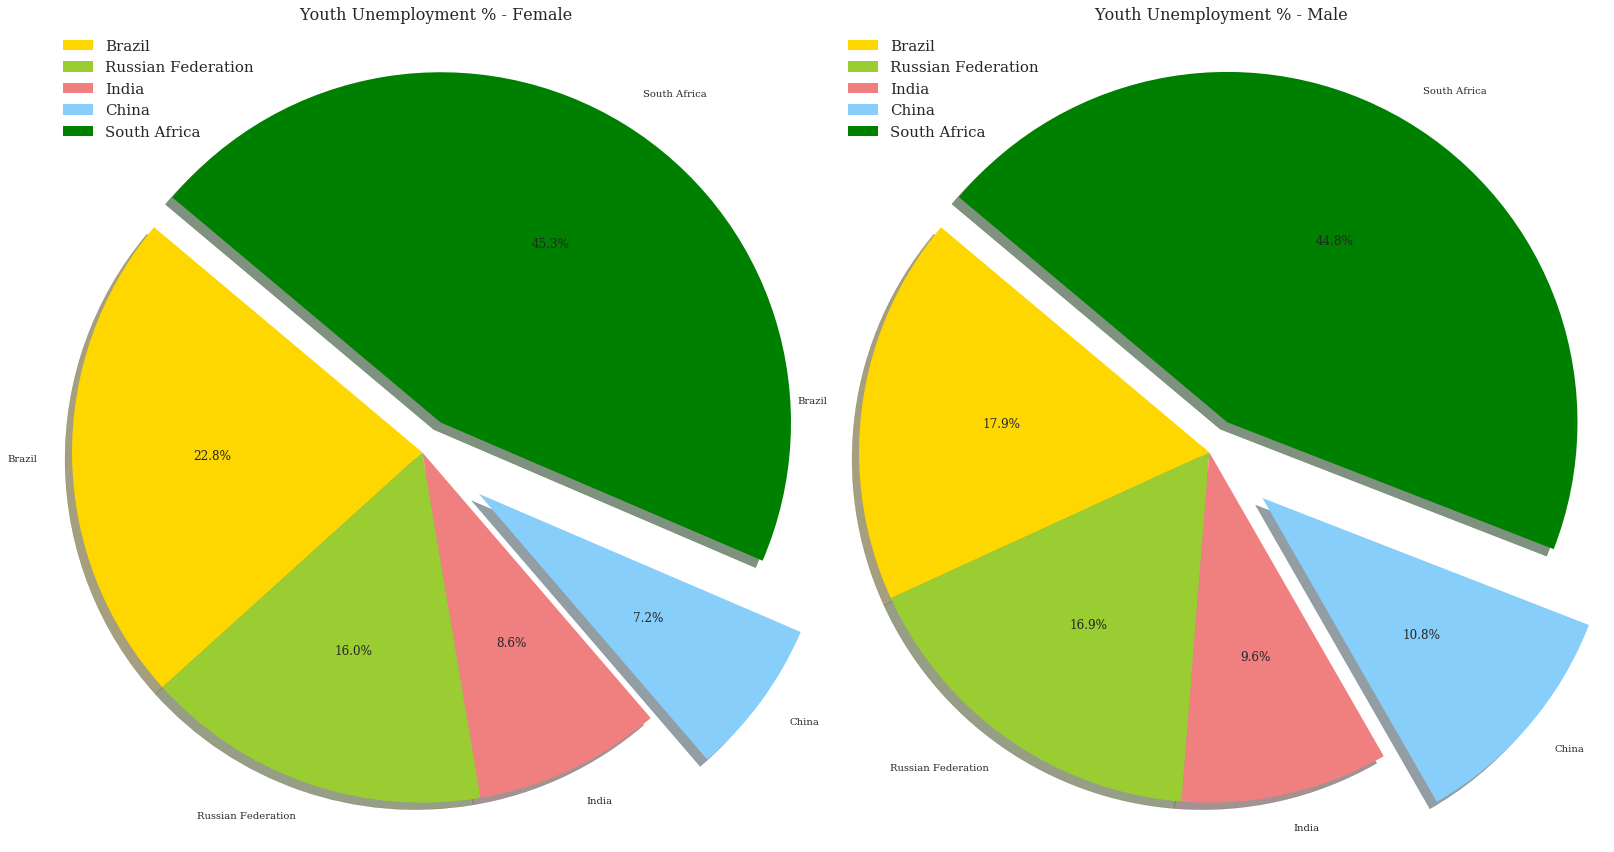

In [24]:
Req = ['Youth Unemployment % - Female','Youth Unemployment % - Male']
Comp = ddi.reset_index()                                               #index reset
Comp = Comp[Comp['Observations'].isin(Req)]                            
Comp= Comp.set_index(['BRICS_Country', 'Observations'])
Comp = Comp.T
meanyouth = Comp.mean()                                                # Calculating the mean Youth Unemployment

labels = 'Brazil', 'Russian Federation', 'India', 'China', 'South Africa'
sizes = [meanyouth['Brazil']['Youth Unemployment % - Female'], meanyouth['Russian Federation']['Youth Unemployment % - Female'], meanyouth['India']['Youth Unemployment % - Female'], meanyouth['China']['Youth Unemployment % - Female'],meanyouth['South Africa']['Youth Unemployment % - Female']]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','green']
explode = (0, 0, 0, 0.2,0.1)  # explode 1st slice

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (22,12))

# Plot
ax1.set_title('Youth Unemployment % - Female', fontsize = 16)           #title
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.axis('equal')
ax1.legend(labels, loc="upper left", fontsize = 15 )

labels = 'Brazil', 'Russian Federation', 'India', 'China', 'South Africa'
sizes = [meanyouth['Brazil']['Youth Unemployment % - Male'], meanyouth['Russian Federation']['Youth Unemployment % - Male'], meanyouth['India']['Youth Unemployment % - Male'], meanyouth['China']['Youth Unemployment % - Male'],meanyouth['South Africa']['Youth Unemployment % - Male']]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','green']
explode = (0, 0, 0, 0.2,0.1)  # explode 1st slice
 
# Plot
ax2.set_title('Youth Unemployment % - Male', fontsize = 16)             #title 
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,           #pie chart 
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.axis('equal')
plt.legend(labels, loc="upper left", fontsize = 15 )
plt.tight_layout()
plt.show()

In [25]:

ddm = ddi.T


Female = dict(type="bar",                                      # trace type
           orientation="h",                                    # make bars horizontal
           name="Female Unemployment",                         # legend entry
           y= ddm["China"].index,                              # y data
           x= ddm['China']["Youth Unemployment % - Female"],   # x data
           marker={"color": "pink"}                            # pink bars
          )
Male = dict(type="bar",                                        # trace type
             orientation="h",                                  # horizontal bars
             name="Male Unemployment",                         # legend entry
             y= ddm["China"].index,                            # y data
             x= ddm['China']["Youth Unemployment % - Male"],   # x data
             marker={"color": "blue"}                          # blue bars
            )
layout = dict(width=1000, height=1000,                        # plot width/height
              yaxis={"title": "Year"},                        # yaxis label
              title="Disparity In Gender Unemployment Rates For China", # title
              xaxis={"title": "Unemployment Rate"}            # xaxis label
             )
iplot(go.Figure(data=[Female, Male], layout=layout))

The consistently higher male unemployment rate in China is possibly related to the larger number of boys than girls in the Chinese population.  [Social scientists](https://www.pri.org/stories/2013-01-03/china-and-worst-ever-man-made-gender-gap) in 2013 estimated that the there could be as many as 122 boys born for every 100 girls in the China, compared to 105-106 boys for every 100 girls in most other countries. The disproportionate number of young men might be the reason that the male youth unemployment rate has consistently been roughly 2 percentage points higher than female youth unemployment. 

In [26]:
ddm = ddi.T


Female = dict(type="bar",                                      # trace type
           orientation="h",                                    # make bars horizontal
           name="Female Unemployment",                         # legend entry
           y= ddm["South Africa"].index,                       # y data
           x= ddm['South Africa']["Youth Unemployment % - Female"], # x data
           marker={"color": "pink"}                            # pink bars
          )
Male = dict(type="bar",                                        # trace type
             orientation="h",                                  # horizontal bars
             name="Male Unemployment",                         # legend entry
             y= ddm["South Africa"].index,                     # y data
             x= ddm['South Africa']["Youth Unemployment % - Male"], # x data
             marker={"color": "blue"}                          # blue bars
            )
layout = dict(width=1000, height=1000,                         # plot width/height
              yaxis={"title": "Year"},                         # yaxis label
              title="Disparity In Gender Unemployment Rates in South Africa", # title
              xaxis={"title": "Unemployment Rate"}             # xaxis label
             )
iplot(go.Figure(data=[Female, Male], layout=layout))

While it is common for countries to have a higher female unemployment rate, South Africa has an extreme situation with a high total unemployment for youth and a substantially higher rate of female youth unemployment. This might reflect a low level of education and lack of job opportunities for young women. Surprisingly, South Africa has greater gender equality than the other BRICS countries, according to the World Economic Forum's [2016 Global Gender Index](http://reports.weforum.org/global-gender-gap-report-2016/rankings/).

# Conclusion and Future of BRICS 

Since the first informal meeting of Foreign Ministers in 2006, the BRICS countries have become more of a political association than an association based on shared or independent economic growth. The political nature of the BRICS connection is perhaps most sharply expressed in the decision to add South Africa, which has not shown economic growth comparable to that of the other countries, and which, despite benefitting in the ways mentioned previously, has not accomplished shown significant improvements in economic growth since joining the association. 

Between the original BRIC countries, the growth has also been extremely uneven, with China acting as the main engine for economic growth. In 2016 Goldman Sachs opted to close its [BRIC investment fund]( https://www.theguardian.com/business/2016/mar/27/brics-bubble-burst-brazil-russia-india-china-south-africa) due to declining assets. There is also a growing uncertainty about the BRICS economic growth given that many of the countries have suffered from internal political issues. According to [Fitch Ratings and Deutsche Bank](http://www.businessinsider.com/fitch-forecast-2017-economic-nationalism-government-spending-globalization-trade-war-china-us-2016-11), the current rise in economic nationalism might also impact economic growth for BRICS countries, and particularly China. 

The vast differences in GDP growth and unemployment rates across the BRICS countries likely reflect the extreme differences between each countries’ economy. Despite the association, it is highly likely that the BRICS countries will continue to move in different directions and that this might jeopardize the cooperation between the countries.  
